### TUESDAY TASK

In [61]:
import pandas as pd
## plotting libraries
from matplotlib import pyplot as plt
## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

In [84]:
from sklearn import datasets
## comment the unneeded data sets

## classification data sets
##X, y= datasets.load_breast_cancer(return_X_y=True,as_frame=True) # load the X,y data as dataframes
#X, y= datasets.load_iris(return_X_y=True,as_frame=True)
#X, y= datasets.load_wine(return_X_y=True,as_frame=True)

churnData = pd.read_csv('DATA_Customer-Churn.csv')
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [13]:
#churnData.dtypes

In [21]:
churnData['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

### Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.


In [24]:
#removed_row = churnData.drop(churnData.index[488])

In [28]:
#churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'])

churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

### Check for null values in the dataframe. Replace the null values.

In [30]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [32]:
# Calculate the mean value of the 'TotalCharges' column
mean_Total_Charges = churnData['TotalCharges'].mean()
mean_Total_Charges

2283.3004408418697

In [33]:
# Replace null values in the 'salary' column with the mean value
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_Total_Charges )

In [34]:
churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
#### Split the data into a training set and a test set.

In [83]:
churnData_new = churnData[['SeniorCitizen','MonthlyCharges', 'TotalCharges', 'Churn']]

churnData_new

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,0,29.85,29.85,No
1,0,56.95,1889.5,No
2,0,53.85,108.15,Yes
3,0,42.30,1840.75,No
4,0,70.70,151.65,Yes
...,...,...,...,...
7038,0,84.80,1990.5,No
7039,0,103.20,7362.9,No
7040,0,29.60,346.45,No
7041,1,74.40,306.6,Yes


In [58]:
# Splitting the data into train and test.

x = churnData_new.drop(["Churn"], axis = 1)
y = churnData_new.Churn

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=419)

### Scale the features either by using normalizer or a standard scaler.

In [86]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data

In [87]:
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(x_train, y_train) # train model
y_pred = model.predict(x_test) # predict test
y_pred_train=model.predict(x_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [88]:
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

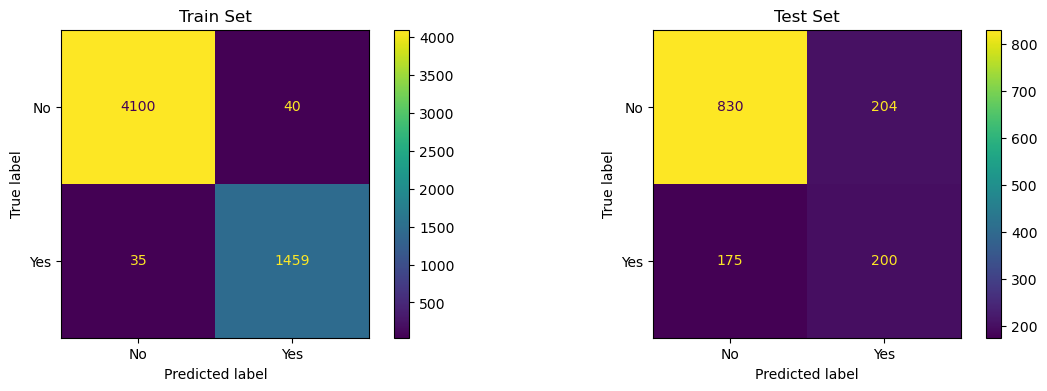

In [89]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,x_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,x_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Performance Metrics

In [95]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test,pos_label='Yes')]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [96]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.99,0.73
1,Precision,0.97,0.50
2,Recall,0.98,0.53
